# Step 1: Load Dataset

In [1]:
#!pip install pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# Reading the data into a Pandas dataframe
data= pd.read_spss(r'C:\Users\Ch. Muhammad Sajjad\Desktop\Bilal Data\Machine Learning Project submission (Regression)\DATA_V3 (1).sav')


# Displaying the first 5 rows of the data
print(data.head())


            N_emp                                           Industry  \
0  more than 1000  Service Industry (Software, Banking, Telecom e...   
1         101-500                                        Agriculture   
2         101-500  Service Industry (Software, Banking, Telecom e...   
3          26-100                                Paper and Packaging   
4        501-1000  Heavy Engineering (Machinery, Automobiles, Mot...   

                    Deptt  Gender          Age  Education     Exp_org  \
0    Finance and Accounts    Male  25-35 years  Bachelors  5-10 years   
1                   Sales    Male  25-35 years  Bachelors    <5 years   
2  Information Technology    Male  25-35 years  Bachelors  5-10 years   
3              Operations  Female  36-45 years  Bachelors  5-10 years   
4    Finance and Accounts    Male  25-35 years    Masters  5-10 years   

      Pos_org    Time_sup  BLM1  ...  SDB2  SDB3  SDB4  SDB5  SDB6  SDB7  \
0  Supervisor   3-5 years   4.0  ...   3.0   2.0   2

In [2]:
data.columns.values

array(['N_emp', 'Industry', 'Deptt', 'Gender', 'Age', 'Education',
       'Exp_org', 'Pos_org', 'Time_sup', 'BLM1', 'BLM2', 'BLM3', 'BLM4',
       'BLM', 'SCM1', 'SCM2', 'SCM3', 'SCM4', 'SCM5', 'SCM6', 'SCM',
       'CP1', 'CP2', 'CP3', 'CP', 'CR1', 'CR2', 'CR3', 'CR', 'LMX1',
       'LMX2', 'LMX3', 'LMX4', 'LMX5', 'LMX6', 'LMX7', 'LMX8', 'LMX9',
       'LMX10', 'LMX11', 'LMX', 'MF1', 'MF2', 'MF3', 'MF4', 'MF5', 'MF6',
       'MF7', 'MF8', 'MF9', 'MF10', 'MF11', 'MF12', 'MF13', 'MF14',
       'MF15', 'MF', 'NR1', 'NR2', 'NR3', 'NR4', 'NR5', 'NR6', 'NR7',
       'NR8', 'NR9', 'NR10', 'NR11', 'NR12', 'NR13', 'NR14', 'NR', 'WK1',
       'WK2', 'WK3', 'WK4', 'WK5', 'WK6', 'WK7', 'WK8', 'WK9', 'WK10',
       'WK', 'PP1', 'PP2', 'PP3', 'PP4', 'PP', 'MI1', 'MI2', 'MI3', 'MI4',
       'MI5', 'MI', 'CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH',
       'ULB1', 'ULB2', 'ULB3', 'ULB4', 'ULB5', 'ULB6', 'ULB', 'UPB1',
       'UPB2', 'UPB3', 'UPB4', 'UPB5', 'UPB6', 'UPB', 'KH1', 'KH2', 'KH3',

# Step 2: Enter IVs

In [3]:
# Print the column names for the user to select from
print("The available variables are:")
print(", ".join(data.columns))

# Set the maximum number of independent variables
max_vars = 4

# Get user input for independent variables
independent_vars = []
while len(independent_vars) < max_vars:
    var = input(f"Enter independent variable {len(independent_vars)+1} of {max_vars} (or 'done' to finish): ")
    if var.lower() == 'done':
        break
    elif var not in data.columns:
        print(f"{var} is not a valid column name. Please try again.")
    elif var in independent_vars:
        print(f"{var} has already been selected. Please choose a different variable.")
    else:
        independent_vars.append(var)
        
# Select the independent variables
X = data[independent_vars]
print (X)

The available variables are:
N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup, BLM1, BLM2, BLM3, BLM4, BLM, SCM1, SCM2, SCM3, SCM4, SCM5, SCM6, SCM, CP1, CP2, CP3, CP, CR1, CR2, CR3, CR, LMX1, LMX2, LMX3, LMX4, LMX5, LMX6, LMX7, LMX8, LMX9, LMX10, LMX11, LMX, MF1, MF2, MF3, MF4, MF5, MF6, MF7, MF8, MF9, MF10, MF11, MF12, MF13, MF14, MF15, MF, NR1, NR2, NR3, NR4, NR5, NR6, NR7, NR8, NR9, NR10, NR11, NR12, NR13, NR14, NR, WK1, WK2, WK3, WK4, WK5, WK6, WK7, WK8, WK9, WK10, WK, PP1, PP2, PP3, PP4, PP, MI1, MI2, MI3, MI4, MI5, MI, CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH, ULB1, ULB2, ULB3, ULB4, ULB5, ULB6, ULB, UPB1, UPB2, UPB3, UPB4, UPB5, UPB6, UPB, KH1, KH2, KH3, KH, SDB1, SDB2, SDB3, SDB4, SDB5, SDB6, SDB7, SDB8, SDB9, SDB10, SDB
Enter independent variable 1 of 4 (or 'done' to finish): CP
Enter independent variable 2 of 4 (or 'done' to finish): LMX
Enter independent variable 3 of 4 (or 'done' to finish): MF
Enter independent variable 4 of 4 (or 'done' to finish):

# Step 3: Enter Mediator

In [4]:
# Set the mediato

max_mediator = 1

# Get user input for mediator
mediator = []
while len(mediator) < max_mediator:
    var1 = input(f"Enter mediator variable ")
    if var1 not in data.columns:
        print(f"{var1} is not a valid column name. Please try again.")
    elif var1 in mediator:
        print(f"{var1} has already been selected. Please choose a different variable.")
    else:
        mediator.append(var1)
        
# Select the independent variables
M = data[mediator]
print(M)

Enter mediator variable WK
      WK
0    2.8
1    3.1
2    5.0
3    3.8
4    4.3
..   ...
214  3.2
215  3.6
216  5.0
217  3.3
218  3.3

[219 rows x 1 columns]


# Step 4: Enter Moderator

In [5]:
# Set the moderator
max_moderator = 1

# Get user input for mediator
moderator = []
while len(moderator) < max_moderator:
    var2 = input(f"Enter moderator variable : ")
    if var2 not in data.columns:
        print(f"{var2} is not a valid column name. Please try again.")
    elif var2 in moderator:
        print(f"{var2} has already been selected. Please choose a different variable.")
    else:
        moderator.append(var2)
        
# Select the independent variables
Mod = data[moderator]
print(Mod)

Enter moderator variable : CH
           CH
0    2.571429
1    3.142857
2    5.000000
3    1.000000
4    4.285714
..        ...
214  2.571429
215  1.142857
216  5.000000
217  3.428571
218  1.571429

[219 rows x 1 columns]


# Step 5: Enter DV

In [6]:
# Set the moderator
max_dependent = 1

# Get user input for mediator
dependent = []
while len(dependent) < max_dependent:
    var3 = input(f"Enter dependent variable : ")
    if var3 not in data.columns:
        print(f"{var2} is not a valid column name. Please try again.")
    elif var3 in dependent:
        print(f"{var2} has already been selected. Please choose a different variable.")
    else:
        dependent.append(var3)
        
# Select the independent variables
Y = data[dependent]
print(Y)

Enter dependent variable : UPB
          UPB
0    2.500000
1    3.000000
2    5.000000
3    1.000000
4    4.166667
..        ...
214  3.500000
215  1.333333
216  5.000000
217  3.333333
218  2.333333

[219 rows x 1 columns]


# Step 6: Visualize the Data

In [46]:
X.iloc[:,0]

0      3.333333
1      3.666667
2      5.000000
3      5.000000
4      4.666667
         ...   
214    3.666667
215    3.666667
216    5.000000
217    3.000000
218    3.666667
Name: CP, Length: 219, dtype: float64

In [47]:
Y

,UPB
0,2.500000
1,3.000000
2,5.000000
3,1.000000
4,4.166667
...,...
214,3.500000
215,1.333333
216,5.000000
217,3.333333


In [48]:
X.shape

(219, 4)

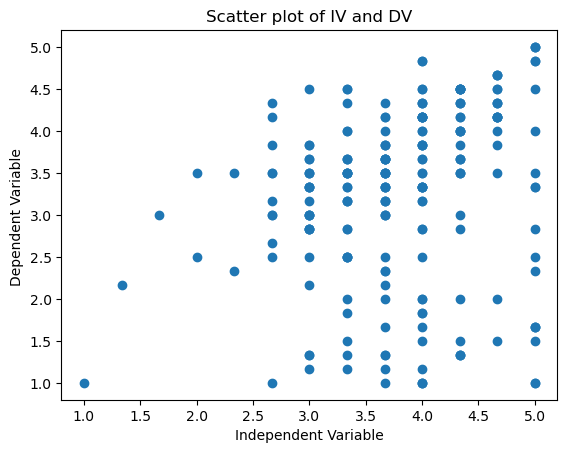

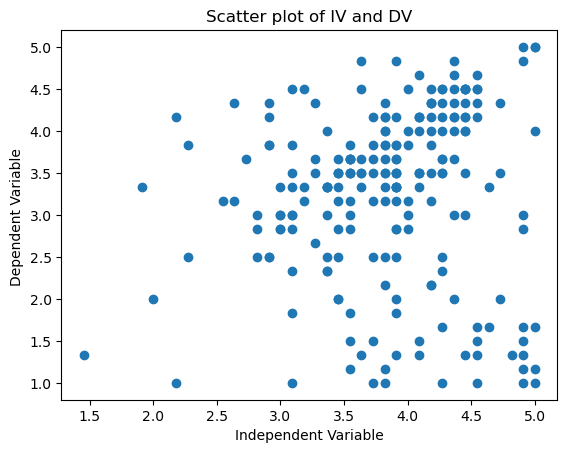

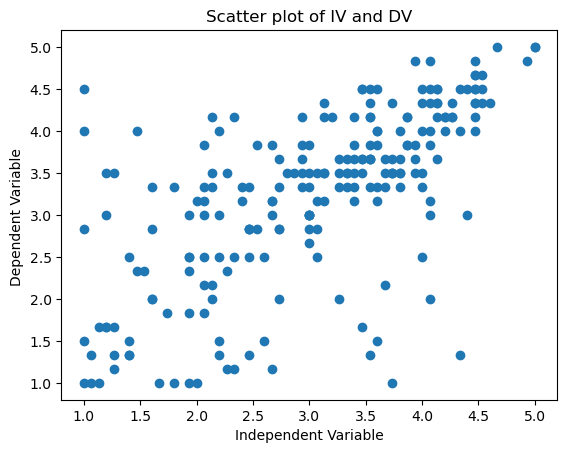

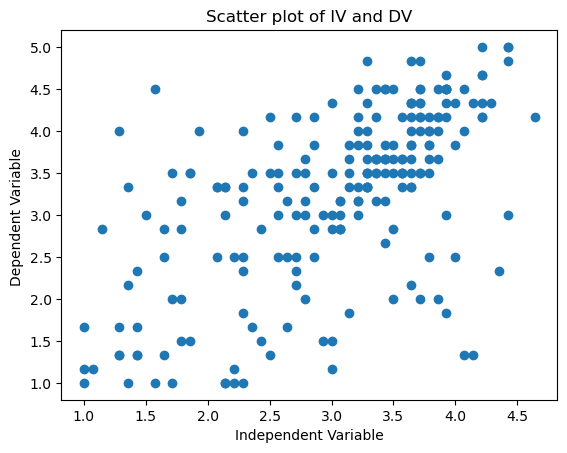

In [49]:
# Create scatter plots for each combination of 4 independent variables and the dependent variable
for i in range(X.shape[1]):
    plt.scatter(np.array(X.iloc[:,i]), np.array(Y))
    plt.title('Scatter plot of IV and DV') #title
    plt.xlabel('Independent Variable') #x label
    plt.ylabel('Dependent Variable ') #y label
    plt.show()
    plt.show()

# Step 7: Preprocess the Data (detect and remove null and duplicate values)

In [50]:
data.head(5)

,N_emp,Industry,Deptt,Gender,Age,Education,Exp_org,Pos_org,Time_sup,BLM1,...,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9,SDB10,SDB
0,more than 1000,"Service Industry (Software, Banking, Telecom e...",Finance and Accounts,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,4.0,...,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,3.1
1,101-500,Agriculture,Sales,Male,25-35 years,Bachelors,<5 years,Supervisor,1-2 year,4.0,...,4.0,1.0,3.0,1.0,4.0,4.0,1.0,4.0,4.0,3.0
2,101-500,"Service Industry (Software, Banking, Telecom e...",Information Technology,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0
3,26-100,Paper and Packaging,Operations,Female,36-45 years,Bachelors,5-10 years,Supervisor,6-10 years,4.0,...,2.0,2.0,4.0,4.0,5.0,2.0,5.0,5.0,5.0,3.9
4,501-1000,"Heavy Engineering (Machinery, Automobiles, Mot...",Finance and Accounts,Male,25-35 years,Masters,5-10 years,Supervisor,3-5 years,4.0,...,4.0,5.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,2.8


In [51]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Length: 219, dtype: bool

In [52]:
# Check for duplicates
if data.duplicated() is None:
    pass
else:
    data.drop_duplicates()

In [53]:
# Check for null values
data.isnull()

,N_emp,Industry,Deptt,Gender,Age,Education,Exp_org,Pos_org,Time_sup,BLM1,...,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9,SDB10,SDB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
data.dropna()

,N_emp,Industry,Deptt,Gender,Age,Education,Exp_org,Pos_org,Time_sup,BLM1,...,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9,SDB10,SDB
0,more than 1000,"Service Industry (Software, Banking, Telecom e...",Finance and Accounts,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,4.0,...,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,3.1
1,101-500,Agriculture,Sales,Male,25-35 years,Bachelors,<5 years,Supervisor,1-2 year,4.0,...,4.0,1.0,3.0,1.0,4.0,4.0,1.0,4.0,4.0,3.0
2,101-500,"Service Industry (Software, Banking, Telecom e...",Information Technology,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0
3,26-100,Paper and Packaging,Operations,Female,36-45 years,Bachelors,5-10 years,Supervisor,6-10 years,4.0,...,2.0,2.0,4.0,4.0,5.0,2.0,5.0,5.0,5.0,3.9
4,501-1000,"Heavy Engineering (Machinery, Automobiles, Mot...",Finance and Accounts,Male,25-35 years,Masters,5-10 years,Supervisor,3-5 years,4.0,...,4.0,5.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0-25,Agriculture,Sales,Male,25-35 years,Bachelors,5-10 years,Supervisor,< 1 year,3.0,...,3.0,2.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,2.9
215,0-25,"Service Industry (Software, Banking, Telecom e...",Marketing,Male,36-45 years,High school,<5 years,Supervisor,3-5 years,5.0,...,3.0,1.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,3.8
216,501-1000,"Light Engineering (Auto Parts, Electrical Appl...",Sales,Female,25-35 years,Bachelors,11-15 years,Manager,6-10 years,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0
217,more than 1000,"Service Industry (Software, Banking, Telecom e...",Information Technology,Male,46-55 years,Masters,11-15 years,Supervisor,3-5 years,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,3.0,5.0,1.0,2.8


In [55]:
data

,N_emp,Industry,Deptt,Gender,Age,Education,Exp_org,Pos_org,Time_sup,BLM1,...,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9,SDB10,SDB
0,more than 1000,"Service Industry (Software, Banking, Telecom e...",Finance and Accounts,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,4.0,...,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,3.1
1,101-500,Agriculture,Sales,Male,25-35 years,Bachelors,<5 years,Supervisor,1-2 year,4.0,...,4.0,1.0,3.0,1.0,4.0,4.0,1.0,4.0,4.0,3.0
2,101-500,"Service Industry (Software, Banking, Telecom e...",Information Technology,Male,25-35 years,Bachelors,5-10 years,Supervisor,3-5 years,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0
3,26-100,Paper and Packaging,Operations,Female,36-45 years,Bachelors,5-10 years,Supervisor,6-10 years,4.0,...,2.0,2.0,4.0,4.0,5.0,2.0,5.0,5.0,5.0,3.9
4,501-1000,"Heavy Engineering (Machinery, Automobiles, Mot...",Finance and Accounts,Male,25-35 years,Masters,5-10 years,Supervisor,3-5 years,4.0,...,4.0,5.0,4.0,1.0,2.0,1.0,1.0,4.0,1.0,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0-25,Agriculture,Sales,Male,25-35 years,Bachelors,5-10 years,Supervisor,< 1 year,3.0,...,3.0,2.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,2.9
215,0-25,"Service Industry (Software, Banking, Telecom e...",Marketing,Male,36-45 years,High school,<5 years,Supervisor,3-5 years,5.0,...,3.0,1.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,3.8
216,501-1000,"Light Engineering (Auto Parts, Electrical Appl...",Sales,Female,25-35 years,Bachelors,11-15 years,Manager,6-10 years,5.0,...,5.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,1.0,3.0
217,more than 1000,"Service Industry (Software, Banking, Telecom e...",Information Technology,Male,46-55 years,Masters,11-15 years,Supervisor,3-5 years,3.0,...,2.0,3.0,3.0,3.0,2.0,3.0,3.0,5.0,1.0,2.8


# Step 8: Visualize the Data

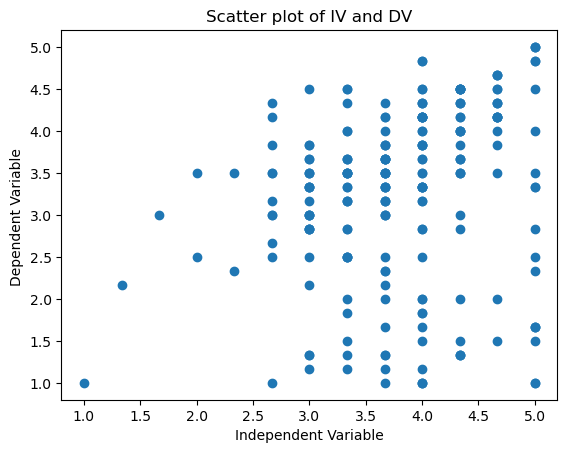

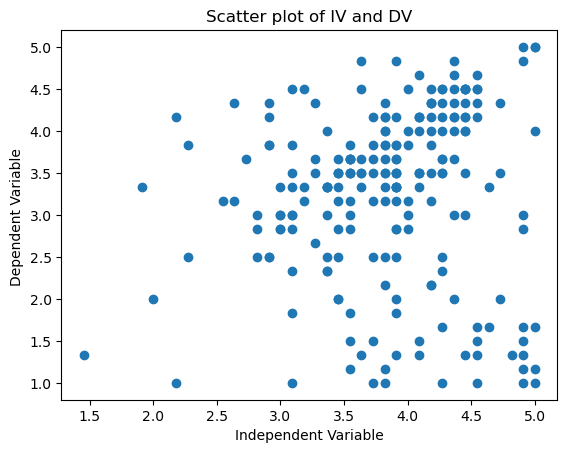

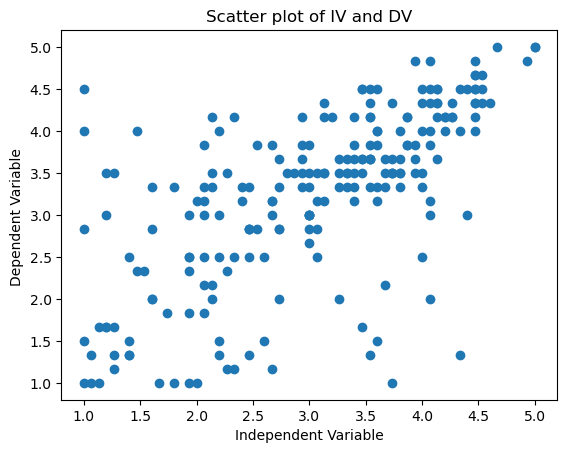

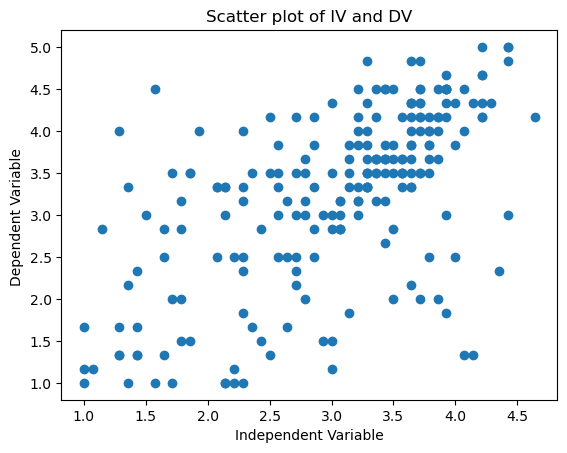

In [56]:
# Create scatter plots for each combination of 4 independent variables and the dependent variable
for i in range(X.shape[1]):
    plt.scatter(np.array(X.iloc[:,i]), np.array(Y))
    plt.title('Scatter plot of IV and DV') #title
    plt.xlabel('Independent Variable') #x label
    plt.ylabel('Dependent Variable ') #y label
    plt.show()

In [57]:
data.columns

Index(['N_emp', 'Industry', 'Deptt', 'Gender', 'Age', 'Education', 'Exp_org',
       'Pos_org', 'Time_sup', 'BLM1',
       ...
       'SDB2', 'SDB3', 'SDB4', 'SDB5', 'SDB6', 'SDB7', 'SDB8', 'SDB9', 'SDB10',
       'SDB'],
      dtype='object', length=131)

In [58]:
data.describe()

,BLM1,BLM2,BLM3,BLM4,BLM,SCM1,SCM2,SCM3,SCM4,SCM5,...,SDB2,SDB3,SDB4,SDB5,SDB6,SDB7,SDB8,SDB9,SDB10,SDB
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,3.735160,3.566210,3.652968,3.461187,3.603881,3.506849,3.552511,3.648402,3.703196,3.844749,...,3.607306,3.305936,3.424658,2.657534,2.684932,2.511416,2.780822,3.867580,2.958904,3.157078
std,1.024111,1.104183,1.144644,1.185579,0.903165,1.242851,1.088190,1.116858,0.957126,0.954760,...,1.125656,1.185738,1.218186,1.232799,1.262116,1.080947,1.276965,0.921606,1.338612,0.519953
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000
25%,3.000000,3.000000,3.000000,3.000000,3.250000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.900000
50%,4.000000,4.000000,4.000000,4.000000,3.750000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.100000
75%,4.000000,4.000000,5.000000,4.000000,4.250000,4.000000,4.000000,5.000000,4.000000,5.000000,...,4.500000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.500000,4.000000,3.350000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [59]:
data.shape

(219, 131)

In [60]:
X.shape

(219, 4)

In [61]:
Y.shape

(219, 1)

# Step 9: Exploratory Data Analysis

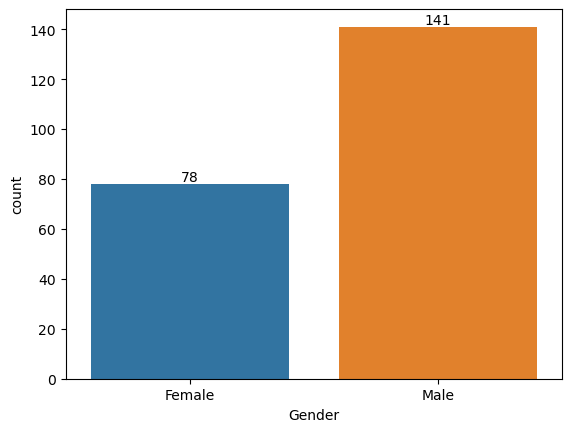

In [62]:
ax = sns.countplot(x='Gender',data=data)
for bars in ax.containers:
    ax.bar_label(bars)

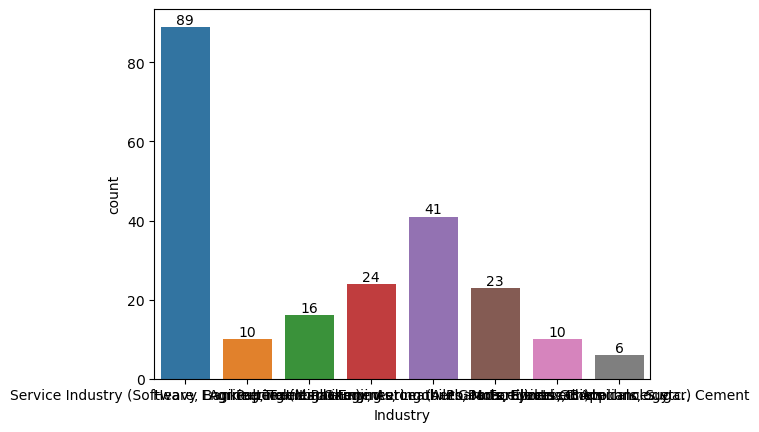

In [63]:
ax = sns.countplot(x='Industry',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

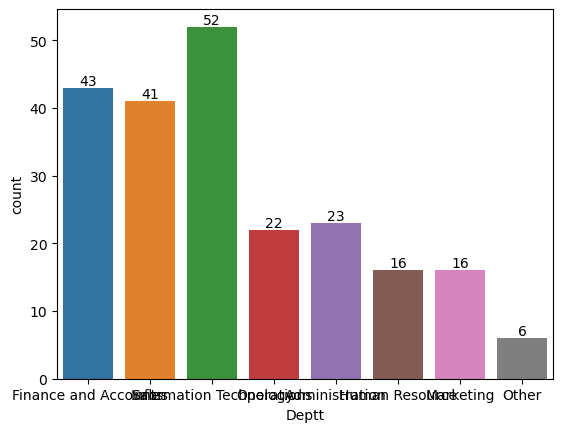

In [64]:
ax = sns.countplot(x='Deptt',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

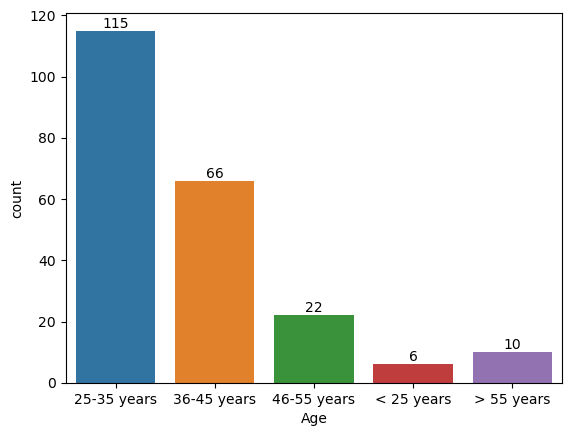

In [65]:
ax = sns.countplot(x='Age',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

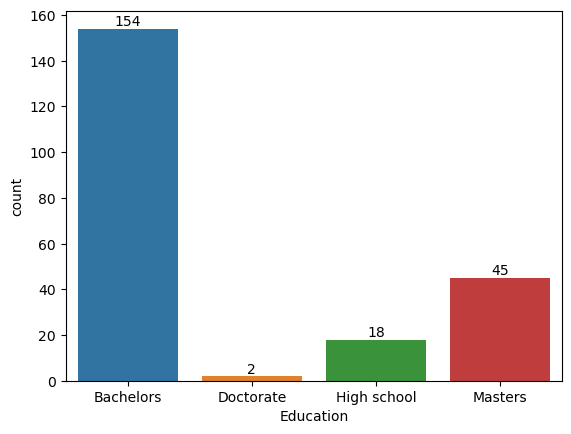

In [66]:
ax = sns.countplot(x='Education',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

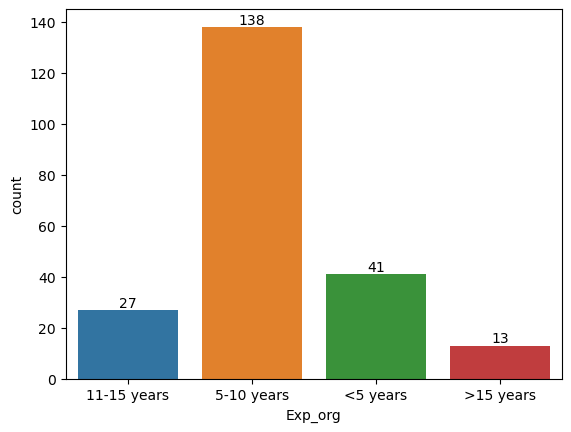

In [67]:
ax = sns.countplot(x='Exp_org',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

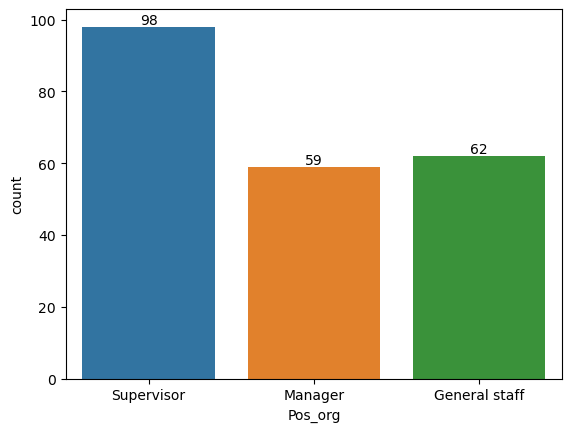

In [68]:
ax = sns.countplot(x='Pos_org',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

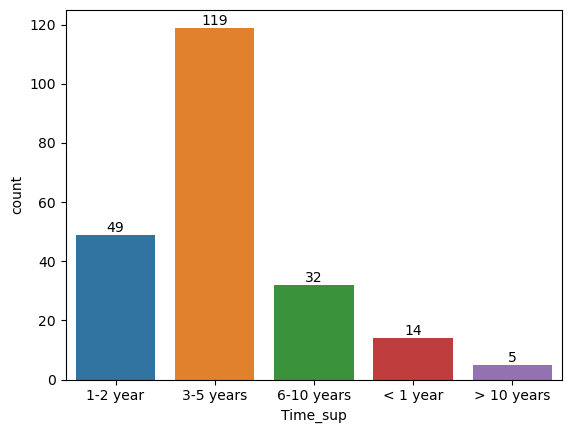

In [69]:
ax = sns.countplot(x='Time_sup',data=data)
for bars in ax.containers:
    ax.bar_label(bars)
#N_emp, Industry, Deptt, Gender, Age, Education, Exp_org, Pos_org, Time_sup

# Step 10: Correlation Analysis

In [70]:
corr_matrix = X.corr()

In [71]:
print(corr_matrix)

           CP       LMX        MF        NR
CP   1.000000  0.364207  0.117152  0.078151
LMX  0.364207  1.000000  0.130944 -0.026383
MF   0.117152  0.130944  1.000000  0.755634
NR   0.078151 -0.026383  0.755634  1.000000


In [72]:
corrcoeff = np.corrcoef(np.array(X),rowvar=False)
print(corrcoeff)

[[ 1.          0.36420709  0.11715207  0.07815144]
 [ 0.36420709  1.          0.13094421 -0.02638292]
 [ 0.11715207  0.13094421  1.          0.75563396]
 [ 0.07815144 -0.02638292  0.75563396  1.        ]]


# Step 11: Multicolinearity Check using Variance Inflation Factor

In [73]:
X

,CP,LMX,MF,NR
0,3.333333,3.454545,2.200000,2.642857
1,3.666667,3.000000,3.000000,3.071429
2,5.000000,5.000000,5.000000,4.428571
3,5.000000,4.545455,1.066667,1.357143
4,4.666667,4.454545,4.266667,4.214286
...,...,...,...,...
214,3.666667,3.454545,3.000000,3.500000
215,3.666667,4.454545,4.333333,4.142857
216,5.000000,5.000000,5.000000,4.428571
217,3.000000,3.181818,3.266667,3.285714


In [74]:
for i in range(X.shape[1]):
    vif=variance_inflation_factor(np.array(X),i)
    print(vif)

27.462887495660954
27.55824912672137
24.010458145590142
28.079126874138083


# Step 14: Multiple Linear Regression

In [75]:
regression_model = sm.OLS((np.array(Y)),(np.array(X)))
results = regression_model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1046.
Date:                Thu, 18 May 2023   Prob (F-statistic):                   1.23e-139
Time:                        16:08:14   Log-Likelihood:                         -248.13
No. Observations:                 219   AIC:                                      504.3
Df Residuals:                     215   BIC:                                      517.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.9511242196475612
0.950214902803795
[8.70579075e-04 8.33678361e-01 3.31578444e-08 1.07386061e-04]
[ 0.23515285 -0.01454636  0.44908428  0.34005856]


# Get prediction

In [77]:
predictions = results.predict(np.array(X))
predictions

array([2.62030339, 3.21030646, 4.85442749, 2.05017571, 4.38177942,
       3.92763773, 2.19288721, 3.0535379 , 2.34071902, 3.02993483,
       2.17903932, 3.67333829, 2.92657382, 3.19213209, 1.82477357,
       2.57149859, 4.14176205, 4.40305324, 2.97803522, 1.96988456,
       2.71181393, 3.64317433, 3.43805098, 2.97561544, 4.37972627,
       4.2960524 , 3.73677999, 1.62133209, 3.52040245, 3.47760617,
       2.49410218, 2.84396523, 3.56333319, 4.16330481, 2.28904442,
       2.1946333 , 3.6450812 , 4.23317023, 4.06747942, 3.87366599,
       3.35752765, 3.56519614, 3.95013159, 3.17808219, 3.19359612,
       3.23773509, 3.48362651, 2.76480628, 1.71004885, 3.70968916,
       2.42394288, 4.05161784, 3.32407869, 3.58784809, 2.36145693,
       2.06418284, 2.48718451, 2.23694745, 3.41263158, 3.59505636,
       4.2960524 , 3.39078045, 2.55787124, 2.85364123, 3.45404703,
       4.34308479, 2.5071321 , 2.87986879, 2.67892392, 3.1326398 ,
       3.25359667, 2.08047414, 2.60611186, 2.57093579, 3.09250

# Evaluation of prediction

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

mae = metrics.mean_absolute_error(Y, predictions)
mse = metrics.mean_squared_error(Y, predictions)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(Y,predictions)


print("Results of sklearn.metrics: \n")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics: 

MAE: 0.5386057630145588
MSE: 0.5644582289281967
RMSE: 0.7513043517298411
R-Squared: 0.4738082453813339


# Step 15: Polynomial regression algorithm with degree=3

In [79]:
DV=np.array(Y).reshape(-1,1)
IVs=np.array(X).reshape(-1,1)
poly_features = PolynomialFeatures(degree=3, include_bias=False) #LinearRegression() will take care of this setting by default, so there’s no need to set include_bias to True.
poly_features.fit(DV)
poly_features = poly_features.transform(DV)
poly_features

array([[  2.5       ,   6.25      ,  15.625     ],
       [  3.        ,   9.        ,  27.        ],
       [  5.        ,  25.        , 125.        ],
       [  1.        ,   1.        ,   1.        ],
       [  4.16666667,  17.36111111,  72.33796296],
       [  3.83333333,  14.69444444,  56.3287037 ],
       [  1.        ,   1.        ,   1.        ],
       [  2.83333333,   8.02777778,  22.74537037],
       [  3.16666667,  10.02777778,  31.75462963],
       [  3.16666667,  10.02777778,  31.75462963],
       [  3.        ,   9.        ,  27.        ],
       [  3.66666667,  13.44444444,  49.2962963 ],
       [  3.        ,   9.        ,  27.        ],
       [  3.5       ,  12.25      ,  42.875     ],
       [  1.66666667,   2.77777778,   4.62962963],
       [  3.        ,   9.        ,  27.        ],
       [  4.83333333,  23.36111111, 112.91203704],
       [  4.5       ,  20.25      ,  91.125     ],
       [  3.83333333,  14.69444444,  56.3287037 ],
       [  2.83333333,   8.02777

In [80]:
poly_reg_model=LinearRegression() # made object of linear regression class
poly_reg_model.fit(poly_features, DV) # Poly_features= IV, and position_salary=DV and actual calculation
poly_reg_model.coef_ # beta0 and beta 1
DV_predicted=poly_reg_model.predict(poly_features) # test_data prediction

# Evaluation of prediction

In [81]:
mae = metrics.mean_absolute_error(DV,DV_predicted)
mse = metrics.mean_squared_error(DV,DV_predicted)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(DV,DV_predicted)

print("Results of sklearn.metrics: \n")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics: 

MAE: 3.5304078280774384e-15
MSE: 1.2524967922678588e-29
RMSE: 3.5390631419457027e-15
R-Squared: 1.0


# Apply polynomial regression algorithm with degree=4

In [82]:
DV=np.array(Y).reshape(-1,1)
IVs=np.array(X).reshape(-1,1)
poly_features = PolynomialFeatures(degree=4, include_bias=False) #LinearRegression() will take care of this setting by default, so there’s no need to set include_bias to True.
poly_features.fit(DV)
poly_features = poly_features.transform(DV)
poly_features

array([[  2.5       ,   6.25      ,  15.625     ,  39.0625    ],
       [  3.        ,   9.        ,  27.        ,  81.        ],
       [  5.        ,  25.        , 125.        , 625.        ],
       [  1.        ,   1.        ,   1.        ,   1.        ],
       [  4.16666667,  17.36111111,  72.33796296, 301.40817901],
       [  3.83333333,  14.69444444,  56.3287037 , 215.92669753],
       [  1.        ,   1.        ,   1.        ,   1.        ],
       [  2.83333333,   8.02777778,  22.74537037,  64.44521605],
       [  3.16666667,  10.02777778,  31.75462963, 100.55632716],
       [  3.16666667,  10.02777778,  31.75462963, 100.55632716],
       [  3.        ,   9.        ,  27.        ,  81.        ],
       [  3.66666667,  13.44444444,  49.2962963 , 180.75308642],
       [  3.        ,   9.        ,  27.        ,  81.        ],
       [  3.5       ,  12.25      ,  42.875     , 150.0625    ],
       [  1.66666667,   2.77777778,   4.62962963,   7.71604938],
       [  3.        ,   9

In [83]:
poly_reg_model=LinearRegression() # made object of linear regression class
poly_reg_model.fit(poly_features, DV) # Poly_features= IV, and position_salary=DV and actual calculation
poly_reg_model.coef_ # beta0 and beta 1
DV_predicted=poly_reg_model.predict(poly_features) # test_data prediction

# Evaluation of prediction

In [84]:
mae = metrics.mean_absolute_error(DV,DV_predicted)
mse = metrics.mean_squared_error(DV,DV_predicted)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(DV,DV_predicted)

print("Results of sklearn.metrics: \n")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics: 

MAE: 6.906499725243509e-14
MSE: 7.443337594889494e-27
RMSE: 8.627477959919397e-14
R-Squared: 1.0
